In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import classification_report

from sklearn.svm import OneClassSVM

from scipy import stats
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

In [2]:
centers = 3

X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.5, n_features=2)
X_noise = np.random.normal(loc=0, scale=1.5, size=(100, 2))
X[900:] += X_noise
y = np.ones(1000)
y[900:] = -1
#print(X)
#print(y)

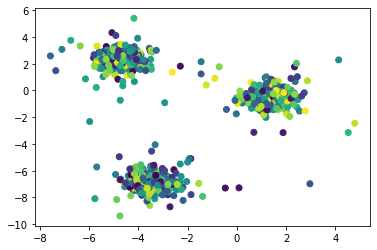

In [3]:
z_sc = stats.zscore(X[:,1])
X_zs = np.c_[np.delete(X[:,0], np.where(z_sc >=3)),
                       np.delete(X[:,1], np.where(z_sc >=3))]             
colors = np.random.rand(X_zs[:,0].size)
plt.scatter(X_zs[:,0],X_zs[:,1],c=colors)
plt.show()

Wytrenuj metodę One-Class SVM dla jądra liniowego i sigmoidalnego. Porównaj wyniki dla różnych hiperparametrów oraz postaraj się uzyskać jak najwyższą dokładność. Wyświetl granice decyzyjne zarówno dla jądra liniowego jak i wielomianowego.

In [6]:
'''
cls = OneClassSVM(kernel='linear', nu=0.14, gamma='auto')
cls.fit(X)
preds = cls.predict(X)
print(classification_report(y, preds))

cls = OneClassSVM(kernel='sigmoid', nu=0.10, gamma='auto')
cls.fit(X)
preds = cls.predict(X)
print(classification_report(y, preds))
'''

#X, y

#For plotting boundaries
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

#For plotting boundaries
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#Fitting and executing plot
def fitting(kernel, nu):
    model = OneClassSVM(kernel=kernel, nu=nu, gamma='auto')
    clf = model.fit(X, y)
    preds = clf.predict(X)
    print("Average accuracy score for kernel: ", '\033[1m', kernel, '\033[0m',  
          "with nu parameter set as: ",'\033[1m', nu, '\033[0m',
          " is: ", '\033[1m', round(accuracy_score(y, preds), 2) * 100, "%", '\033[0m')
    
    #Making plot with boundaries:
    fig, ax = plt.subplots()
    title = ('Decision surface of ',kernel,' SVC ')
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_ylabel('y')
    ax.set_xlabel('x')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()
    

Average accuracy score for kernel:   linear  with nu parameter set as:   0.001   is:   82.0 % 


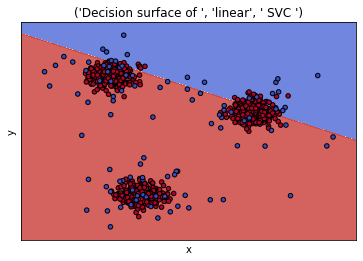

Average accuracy score for kernel:   sigmoid  with nu parameter set as:   0.001   is:   90.0 % 


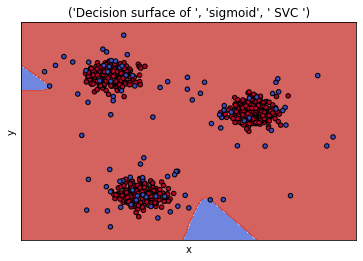

Average accuracy score for kernel:   poly  with nu parameter set as:   0.001   is:   51.0 % 


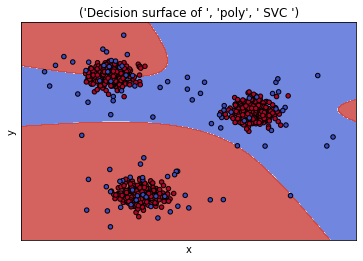

Average accuracy score for kernel:   linear  with nu parameter set as:   0.01   is:   38.0 % 


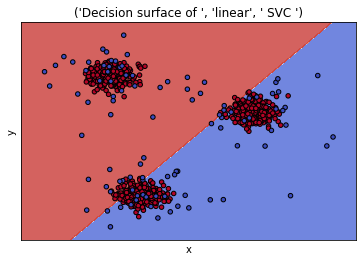

Average accuracy score for kernel:   sigmoid  with nu parameter set as:   0.01   is:   90.0 % 


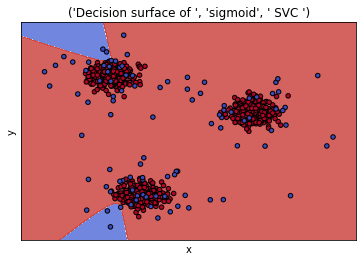

Average accuracy score for kernel:   poly  with nu parameter set as:   0.01   is:   87.0 % 


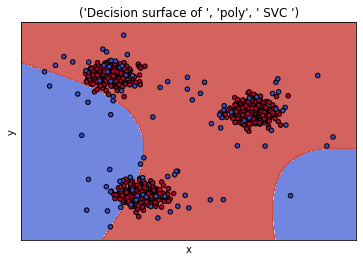

Average accuracy score for kernel:   linear  with nu parameter set as:   0.1   is:   64.0 % 


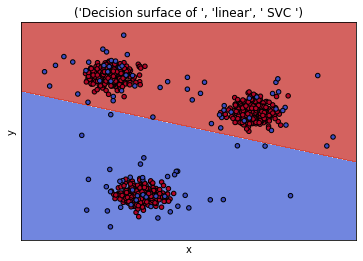

Average accuracy score for kernel:   sigmoid  with nu parameter set as:   0.1   is:   82.0 % 


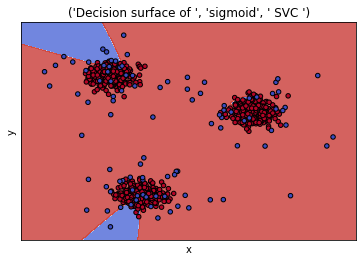

Average accuracy score for kernel:   poly  with nu parameter set as:   0.1   is:   63.0 % 


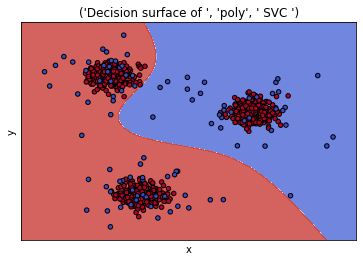

Average accuracy score for kernel:   linear  with nu parameter set as:   0.15   is:   64.0 % 


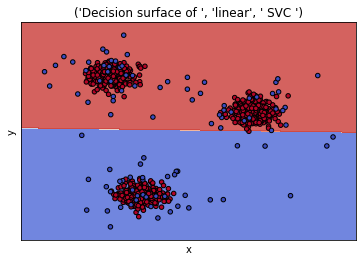

Average accuracy score for kernel:   sigmoid  with nu parameter set as:   0.15   is:   78.0 % 


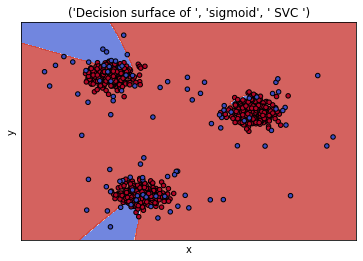

Average accuracy score for kernel:   poly  with nu parameter set as:   0.15   is:   63.0 % 


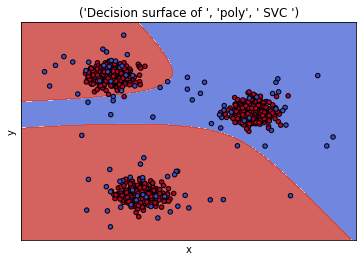

Average accuracy score for kernel:   linear  with nu parameter set as:   1   is:   10.0 % 


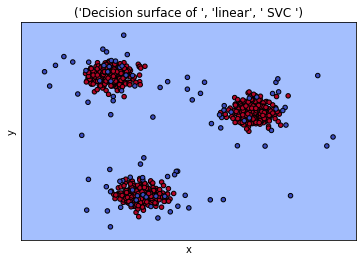

Average accuracy score for kernel:   sigmoid  with nu parameter set as:   1   is:   10.0 % 


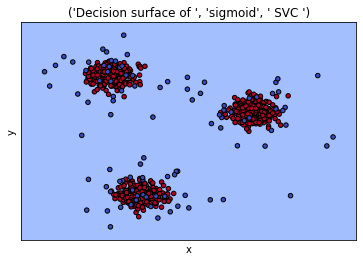

Average accuracy score for kernel:   poly  with nu parameter set as:   1   is:   10.0 % 


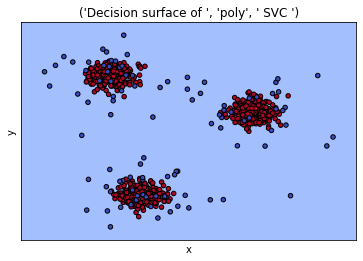

In [7]:
nus = [0.001, 0.01, 0.1, 0.15, 1]

for i in nus:
    fitting("linear", i)
    fitting("sigmoid", i)
    fitting("poly", i)